# CHI SQUARE

## Introduction to Chi-Square Tests

The chi-square test, also known as the χ² test, is a non-parametric test used for analyzing frequencies in categorical data.
It helps determine if there is a significant association between categorical variables.

Unlike t-tests, which examine population parameters (e.g., mean), chi-square tests focus on observed vs. expected frequencies,
making them ideal for categorical data.


# Libraries Used:

In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt

# Comparing t-tests and Chi-Square Tests

t-tests are parametric tests used for continuous variables, typically analyzing sample means to test hypotheses about population parameters.
A common use is comparing means between two groups, using the t-distribution for significance testing.

In contrast, chi-square tests are non-parametric and focus on categorical data, examining the association between variables rather than means.
This distinction makes each test suitable for different types of data analysis.

In [2]:
# Generate sample data
sample_data = stats.norm.rvs(loc=20, scale=2, size=50, random_state=5)

# Perform one-sample t-test with a hypothetical mean of 21
result = stats.ttest_1samp(sample_data, 21)
print(result)


TtestResult(statistic=-3.335711380689097, pvalue=0.0016285199369388422, df=49)


# Chi-Square Tests Overview

Chi-Square Tests, on the other hand, apply to categorical data, where we are interested in frequencies rather than means.
There are three primary types:

1. **Goodness of Fit**: Compares observed frequencies to expected frequencies under a theoretical distribution.
2. **Test for Independence**: Tests if two categorical variables are independent of each other.
3. **Test for Homogeneity**: Compares distribution frequencies across different groups.

# Chi-Square Test for Goodness of Fit

In a goodness of fit test, we compare observed frequencies in data to expected frequencies under a specific hypothesis.
For instance, we could test if a coin is fair by comparing observed counts of heads and tails with expected counts.

### Example: Super Bowl Coin Toss Outcomes

Assume a fair coin toss should produce heads and tails equally often. We analyze data from Super Bowl coin tosses and perform a chi-square test for goodness of fit.

**Hypotheses for the chi-square test**
- Null Hypothesis $H_0$: The coin toss is fair (50% heads, 50% tails).
- Alternative Hypothesis $H_1$: The coin toss is not fair (unequal outcomes).


1. **Observed Frequencies**: Count the actual outcomes of heads and tails from the coin tosses.
2. **Expected Frequencies**: For a fair coin, we would expect an equal number of heads and tails.
3. **Chi-Square Calculation**: Use the formula to determine the chi-square statistic:


   $χ² = \frac{∑ (O_i - E_i)²}{E_i}$


   - where $O_i$ is the observed frequency
   - $E_i$ is the expected frequency.

4. **Interpretation**: Compare the calculated chi-square value to the critical value from the chi-square distribution table based on the degrees of freedom. 
   If the calculated value exceeds the critical value, we reject the null hypothesis, suggesting that the coin may not be fair.

In [4]:
import pandas as pd
from scipy import stats

# Load Super Bowl coin toss data
sb_data = pd.read_csv("superbowl.csv")
coin_toss_counts = sb_data["Coin Toss Outcome"].value_counts()

# Observed and expected frequencies
observed = coin_toss_counts.values
expected = [sum(coin_toss_counts) / 2] * 2  # Assuming a fair coin

# Perform chi-square test
result = stats.chisquare(observed, expected)

# Print the result
print(result)

Power_divergenceResult(statistic=0.16363636363636364, pvalue=0.6858304344516056)


In [5]:
# Significance level (alpha)
alpha = 0.05

# Decision based on p-value
if result.pvalue < alpha:
    print("Reject the null hypothesis: The coin toss is not fair.")
else:
    print("Fail to reject the null hypothesis: The coin toss is fair.")

Fail to reject the null hypothesis: The coin toss is fair.


### Conclusion

1. **Chi-Square Statistic**: 0.1636
2. **p-value**: 0.6858

Based on the results of the Chi-Square Test for Goodness of Fit, the p-value (0.6858) is significantly greater than the common significance level of 0.05. Therefore, we **fail to reject the null hypothesis**.

This suggests that there is no significant evidence to conclude that the coin toss outcomes deviate from what we would expect from a fair coin (50% heads and 50% tails). In other words, the data supports the claim that the coin is fair.


# Chi-Square Test for Independence

This test checks whether two categorical variables are independent. 
For example, we might examine whether winning a Super Bowl game is related to winning the coin toss.

#### Hypotheses for the Chi-Square Test for Independence
- Null Hypothesis $H_0$: Winning the Super Bowl game is independent of winning the coin toss.
- Alternative Hypothesis $H_1$: Winning the Super Bowl game is not independent of winning the coin toss.


### Example: Super Bowl Game and Coin Toss Winners


In [6]:
# Create contingency table
independence_table = pd.crosstab(sb_data["Coin Toss Winner"], sb_data["Game Winner"])

# Perform chi-square test for independence
chi2, p, dof, ex = stats.chi2_contingency(independence_table)
print("Chi-square statistic:", chi2)
print("p-value:", p)


Chi-square statistic: 0.5920138888888885
p-value: 0.44164141533080714


## Interpretation

- **Chi-square Statistic**: 0.5920
- **p-value**: 0.4416

## Conclusion

- **Comparison with Alpha (0.05)**: Since the p-value (0.4416) is greater than the significance level (alpha = 0.05), you fail to reject the null hypothesis.

- **Final Decision**: "Winning the Super Bowl game is independent of winning the coin toss." This suggests that there is no significant relationship between the outcomes of the coin toss and the results of the Super Bowl games based on the data you analyzed.


# Chi-Square Test for Homogeneity

This test compares the distributions of a categorical variable across multiple groups. It answers questions like whether the winning frequency in NFL games differs before and after a specific period.

## Example: NFL Home-Field Advantage Before and After 2020

### Purpose
To test if the distribution of NFL game winners differs significantly between two periods: 
- **Before** (2002-2019) and **After** (2020 onward).

### Hypotheses

- **Null Hypothesis (H0)**: The distribution of NFL game winners is the same before (2002-2019) and after (2020 onward) the specified period. 
- **Alternative Hypothesis (H1)**: The distribution of NFL game winners differs between the two periods (before and after 2020).


#### How
1. **Contingency Table**: We create a table of game winners across the two periods.
2. **Chi-Square Test**: Calculates if observed winner distributions deviate from expected distributions (assuming no change over time).
3. **Interpret p-value**: 
   - Low p-value (< 0.05) → Significant change in winning patterns.
   - High p-value → No significant change.

In [51]:
nfl_data = pd.read_csv('nfl_games.csv')
nfl_data.head()

,date,season,neutral,playoff,team1,team2,elo1,elo2,elo_prob1,score1,score2,result1
0,1920-09-26,1920,0,0,RII,STP,1503.947,1300.000,0.824651,48,0,1.0
1,1920-10-03,1920,0,0,AKR,WHE,1503.420,1300.000,0.824212,43,0,1.0
2,1920-10-03,1920,0,0,RCH,ABU,1503.420,1300.000,0.824212,10,0,1.0
3,1920-10-03,1920,0,0,DAY,COL,1493.002,1504.908,0.575819,14,0,1.0
4,1920-10-03,1920,0,0,RII,MUN,1516.108,1478.004,0.644171,45,0,1.0


In [52]:
# Create Game Winner column
nfl_data["Game Winner"] = nfl_data.apply(lambda row: row["team1"] if row["result1"] == 1.0 else row["team2"], axis=1)
nfl_data.head()

,date,season,neutral,playoff,team1,team2,elo1,elo2,elo_prob1,score1,score2,result1,Game Winner
0,1920-09-26,1920,0,0,RII,STP,1503.947,1300.000,0.824651,48,0,1.0,RII
1,1920-10-03,1920,0,0,AKR,WHE,1503.420,1300.000,0.824212,43,0,1.0,AKR
2,1920-10-03,1920,0,0,RCH,ABU,1503.420,1300.000,0.824212,10,0,1.0,RCH
3,1920-10-03,1920,0,0,DAY,COL,1493.002,1504.908,0.575819,14,0,1.0,DAY
4,1920-10-03,1920,0,0,RII,MUN,1516.108,1478.004,0.644171,45,0,1.0,RII


This code adds a "Game Winner" column to nfl_data, labeling each game with the winning team:

- If result1 == 1.0, team1 won, so "Game Winner" is set to team1.
- Otherwise, it assigns team2 as the winner.
- This column is useful for analyzing team performance over time.

In [53]:
# Subset data for analysis
nfl_data_subset = nfl_data[nfl_data["season"] >= 2002].copy()  # Use .copy() to avoid SettingWithCopyWarning
nfl_data_subset.head()

,date,season,neutral,playoff,team1,team2,elo1,elo2,elo_prob1,score1,score2,result1,Game Winner
11735,2002-09-05,2002,0,0,NYG,SF,1485.669,1561.242,0.484789,13,16,0.0,SF
11736,2002-09-08,2002,0,0,CLE,KC,1446.242,1475.100,0.551826,39,40,0.0,KC
11737,2002-09-08,2002,0,0,CHI,MIN,1565.787,1452.964,0.735679,27,23,1.0,CHI
11738,2002-09-08,2002,0,0,CAR,BAL,1370.952,1572.940,0.312477,10,7,1.0,CAR
11739,2002-09-08,2002,0,0,CIN,LAC,1417.743,1407.844,0.606149,6,34,0.0,LAC


In [54]:
nfl_data_subset.loc[nfl_data_subset["season"] <= 2019, "Period"] = "Before"
nfl_data_subset.loc[nfl_data_subset["season"] > 2019, "Period"] = "After"

nfl_data_subset.head()

,date,season,neutral,playoff,team1,team2,elo1,elo2,elo_prob1,score1,score2,result1,Game Winner,Period
11735,2002-09-05,2002,0,0,NYG,SF,1485.669,1561.242,0.484789,13,16,0.0,SF,Before
11736,2002-09-08,2002,0,0,CLE,KC,1446.242,1475.100,0.551826,39,40,0.0,KC,Before
11737,2002-09-08,2002,0,0,CHI,MIN,1565.787,1452.964,0.735679,27,23,1.0,CHI,Before
11738,2002-09-08,2002,0,0,CAR,BAL,1370.952,1572.940,0.312477,10,7,1.0,CAR,Before
11739,2002-09-08,2002,0,0,CIN,LAC,1417.743,1407.844,0.606149,6,34,0.0,LAC,Before


In [55]:
# Create contingency table
homogeneity_table = pd.crosstab(nfl_data_subset["Period"], nfl_data_subset["Game Winner"])
homogeneity_table

Game Winner,ARI,ATL,BAL,BUF,CAR,CHI,CIN,CLE,DAL,DEN,...,NYG,NYJ,OAK,PHI,PIT,SEA,SF,TB,TEN,WSH
Period,,,,,,,,,,,,,,,,,,,,,
After,8,4,12,15,5,8,5,12,6,5,...,6,2,8,4,12,12,6,15,11,7
Before,132,160,178,126,158,142,135,89,161,170,...,147,135,105,180,198,182,138,122,145,118


In [56]:
# Perform chi-square test for homogeneity
chi2, p, dof, ex = stats.chi2_contingency(homogeneity_table)
print("Chi-square statistic:", chi2)
print("p-value:", p)


Chi-square statistic: 65.73475199088233
p-value: 0.00026989544985461225


### Conclusions

1. **Chi-Square Statistic**: 65.73
2. **p-value**: 0.00027

The p-value (0.00027) is significantly less than the significance level (alpha = 0.05).

### Final Decision

**Reject the Null Hypothesis (H0)**: The distribution of NFL game winners differs significantly between the periods before and after 2020. This suggests that there has been a notable change in game outcomes, possibly indicating variations in home-field advantage or other influencing factors affecting game results during these periods.


# Visualizing Chi-Square Distribution

The shape of the chi-square distribution varies based on degrees of freedom (df), 
which are determined by the number of categories minus one.

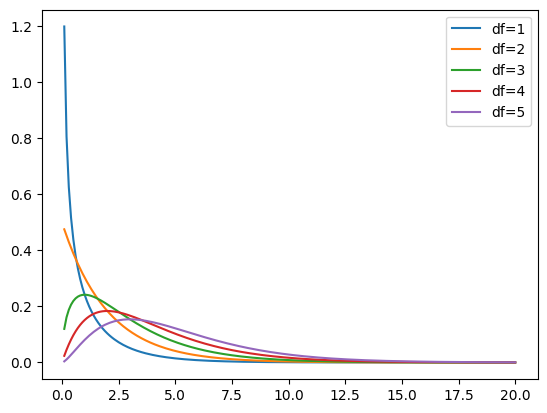

In [57]:
# Plot chi-square distribution for various degrees of freedom
fig, ax = plt.subplots()
x = np.linspace(0.1, 20, 200)
for df in range(1, 6):
    ax.plot(x, stats.chi2.pdf(x, df), label=f'df={df}')
ax.legend()
plt.show()


# Key Takeaways from Visualizing the Chi-Square Distribution

1. **Degrees of Freedom Impact Shape**: The shape of the chi-square distribution changes as the degrees of freedom (df) increase. 
   Lower df values yield a more skewed distribution, while higher df values result in a more symmetrical shape.

2. **Critical Values Shift**: As df increases, the critical values for significance also change. 
   This means that more degrees of freedom generally lead to a higher chi-square statistic needed to reject the null hypothesis.

3. **Area Under the Curve**: The total area under the chi-square distribution curve equals 1, 
   and as df increases, the peak of the distribution shifts to the right, indicating that higher values of the chi-square statistic become more probable.

4. **Applications in Hypothesis Testing**: Understanding the shape of the distribution helps in determining the appropriate critical values for hypothesis tests, 
   making it crucial for interpreting the results of chi-square tests effectively.

5. **Visualization Aids Understanding**: Plotting the distribution provides a visual representation that can enhance comprehension of how the chi-square statistic behaves under different conditions, 
   which is useful for both teaching and practical applications in statistics.


# Real-Life Examples of Chi-Square Applications with Test Types

1. **Market Research**: 
   - **Test Type**: Chi-Square Test for Independence
   - Companies use chi-square tests to analyze consumer preferences. 
   They survey customers about their preferred product features and use chi-square tests to determine if preferences vary by demographic groups like age or gender.

2. **Medical Studies**: 
   - **Test Type**: Chi-Square Test for Independence
   - In clinical trials, researchers may use chi-square tests to determine if there is an association between treatment types and patient outcomes (e.g., recovery vs. no recovery). 
   This helps assess whether the treatment effectiveness differs among demographic groups.

3. **Election Polls**: 
   - **Test Type**: Chi-Square Test for Independence
   - Political analysts often use chi-square tests to evaluate whether voting patterns are independent of demographic factors such as age, education, or ethnicity, 
   aiding in understanding how different groups vote.

4. **Sports Analytics**: 
   - **Test Type**: Chi-Square Test for Independence
   - Sports analysts might use chi-square tests to evaluate whether winning rates are independent of home-field advantage. 
   For example, they can analyze win-loss records of teams before and after changes in stadium capacity or crowd presence.

5. **Education Research**: 
   - **Test Type**: Chi-Square Test for Independence
   - Educators might use chi-square tests to analyze test scores across different teaching methods or curricula to see if there are significant differences in outcomes among groups of students.

6. **Quality Control**: 
   - **Test Type**: Chi-Square Test for Homogeneity
   - In manufacturing, companies can use chi-square tests to determine if defect rates differ across different production lines or shifts, helping identify areas that need improvement.

7. **Genetics**: 
   - **Test Type**: Chi-Square Goodness of Fit Test
   - In genetics studies, chi-square tests are used to determine if observed genetic trait distributions fit expected Mendelian ratios, helping researchers understand inheritance patterns.

8. **Customer Satisfaction Surveys**: 
   - **Test Type**: Chi-Square Test for Homogeneity
   - Businesses can analyze survey results to see if satisfaction levels differ by customer segments, allowing for targeted improvements in service or product offerings.

9. **Social Science Research**: 
   - **Test Type**: Chi-Square Test for Independence
   - Researchers may study social behaviors, such as whether the frequency of certain social activities (e.g., attending events) is independent of factors like income level or education.

10. **Public Health Studies**: 
   - **Test Type**: Chi-Square Test for Independence
   - Chi-square tests can be applied to examine relationships between health behaviors (e.g., smoking status) and health outcomes (e.g., incidence of lung disease) across different population groups.